### Import dataset and data cleaning

In [37]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [38]:
df <- read.csv("Cleaned_DS_Jobs.csv", header=TRUE)

head(df, 5)

Job.Title         Salary.Estimate
1 Sr Data Scientist 137-171        
2 Data Scientist    137-171        
3 Data Scientist    137-171        
4 Data Scientist    137-171        
5 Data Scientist    137-171        
  Job.Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [39]:
sector <- as.data.frame(table(df$Sector))
sector <- sector[order(sector$Freq, decreasing=TRUE),]
sector

,Var1,Freq
,<fct>,<int>
13,Information Technology,178
6,Business Services,120
1,-1,71
5,Biotech & Pharmaceuticals,66
3,Aerospace & Defense,46
14,Insurance,32
10,Finance,31
15,Manufacturing,23
12,Health Care,21


### Drop the row with Sector -1

In [40]:
df <- subset(df, Sector != "-1")

sector <- as.data.frame(table(df$Sector))
sector <- sector[order(sector$Freq, decreasing=TRUE), ]
sector

,Var1,Freq
,<fct>,<int>
12,Information Technology,178
5,Business Services,120
4,Biotech & Pharmaceuticals,66
2,Aerospace & Defense,46
13,Insurance,32
9,Finance,31
14,Manufacturing,23
11,Health Care,21
10,Government,17


In [41]:
# Get the column names
column_names <- colnames(df)

# Print the column names
print(column_names)

 [1] "Job.Title"         "Salary.Estimate"   "Job.Description"  
 [4] "Rating"            "Company.Name"      "Location"         
 [7] "Headquarters"      "Size"              "Type.of.ownership"
[10] "Industry"          "Sector"            "Revenue"          
[13] "min_salary"        "max_salary"        "avg_salary"       
[16] "job_state"         "same_state"        "company_age"      
[19] "python"            "excel"             "hadoop"           
[22] "spark"             "aws"               "tableau"          
[25] "big_data"          "job_simp"          "seniority"        


Normality Test

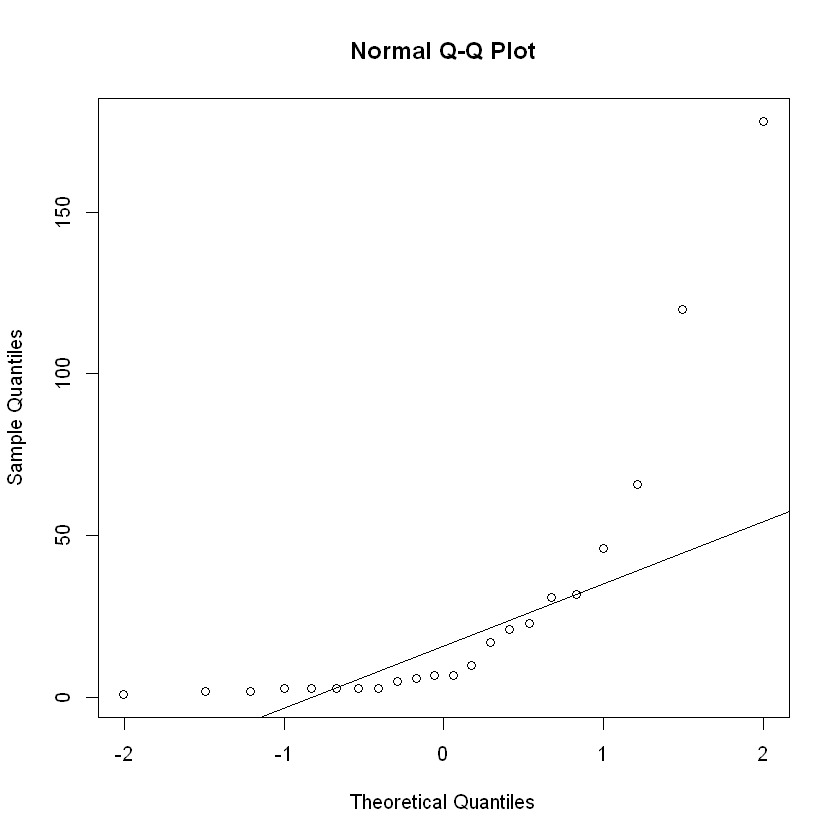

In [42]:
sector_numeric <- sector$Freq  # Extract the numeric column
qqnorm(sector_numeric)
qqline(sector_numeric)

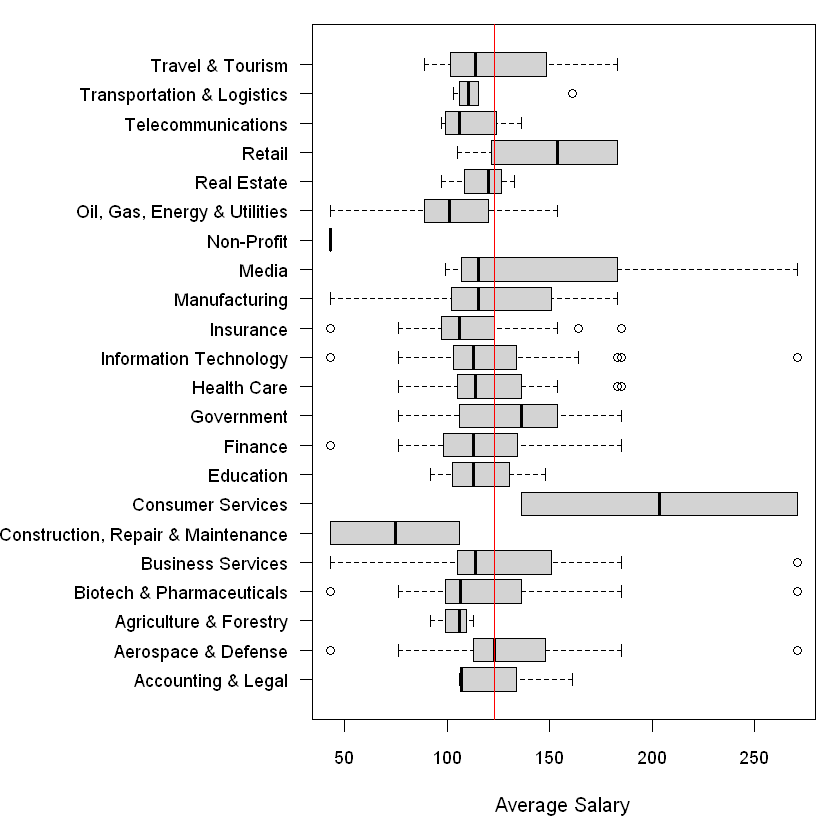

In [43]:
# Set the margin and plot size
par(mar=c(5, 13, 1, 1))  # Adjust the margin if needed
par(cex.axis = 0.9)
boxplot(avg_salary~Sector, data=df, xlab="Average Salary",las = 1, horizontal=TRUE, ylab=" ")
abline(v=mean(df$avg_salary), col="red")

In [44]:
aggregate(avg_salary, list(Sector), data=df, FUN=summary)

Group.1,x
<chr>,"<dbl[,6]>"
Accounting & Legal,"106, 106.50, 107.0, 124.6667, 134.00, 161"
Aerospace & Defense,"43, 113.00, 123.0, 132.4783, 148.00, 271"
Agriculture & Forestry,"92, 99.00, 106.0, 103.6667, 109.50, 113"
Biotech & Pharmaceuticals,"43, 99.00, 106.5, 122.6212, 136.00, 271"
Business Services,"43, 105.00, 114.0, 129.8833, 149.50, 271"
"Construction, Repair & Maintenance","43, 58.75, 74.5, 74.5000, 90.25, 106"
Consumer Services,"136, 169.75, 203.5, 203.5000, 237.25, 271"
Education,"92, 102.50, 113.0, 117.6667, 130.50, 148"
Finance,"43, 98.00, 113.0, 115.6774, 134.50, 185"


In [60]:
sector_counts <- aggregate(df$avg_salary, by = list(df$Sector), FUN = length)
names(sector_counts) <- c("Sector", "Freq")
sector_counts

Sector,Freq
<chr>,<int>
Accounting & Legal,3
Aerospace & Defense,46
Agriculture & Forestry,3
Biotech & Pharmaceuticals,66
Business Services,120
"Construction, Repair & Maintenance",2
Consumer Services,2
Education,3
Finance,31


Filter the sector with more than 30 data points

In [61]:
# Extract the sectors with more than 30 data points
selected_sectors <- subset(sector_counts, sector_counts$Freq > 30)
selected_sectors

,Sector,Freq
,<chr>,<int>
2,Aerospace & Defense,46
4,Biotech & Pharmaceuticals,66
5,Business Services,120
9,Finance,31
12,Information Technology,178
13,Insurance,32


In [62]:
# Filter the original data frame based on selected sectors
selected_df <- subset(df, Sector %in% selected_sectors$Sector)
group <- unique(selected_df$Sector)
group

[1] "Insurance"                 "Business Services"        
[3] "Information Technology"    "Biotech & Pharmaceuticals"
[5] "Finance"                   "Aerospace & Defense"

In [63]:
df_new <- subset(selected_df, select=c("Sector", "avg_salary" ))
head(df_new)

,Sector,avg_salary
,<chr>,<int>
1,Insurance,154
2,Business Services,154
3,Business Services,154
5,Business Services,154
6,Information Technology,154
7,Biotech & Pharmaceuticals,154


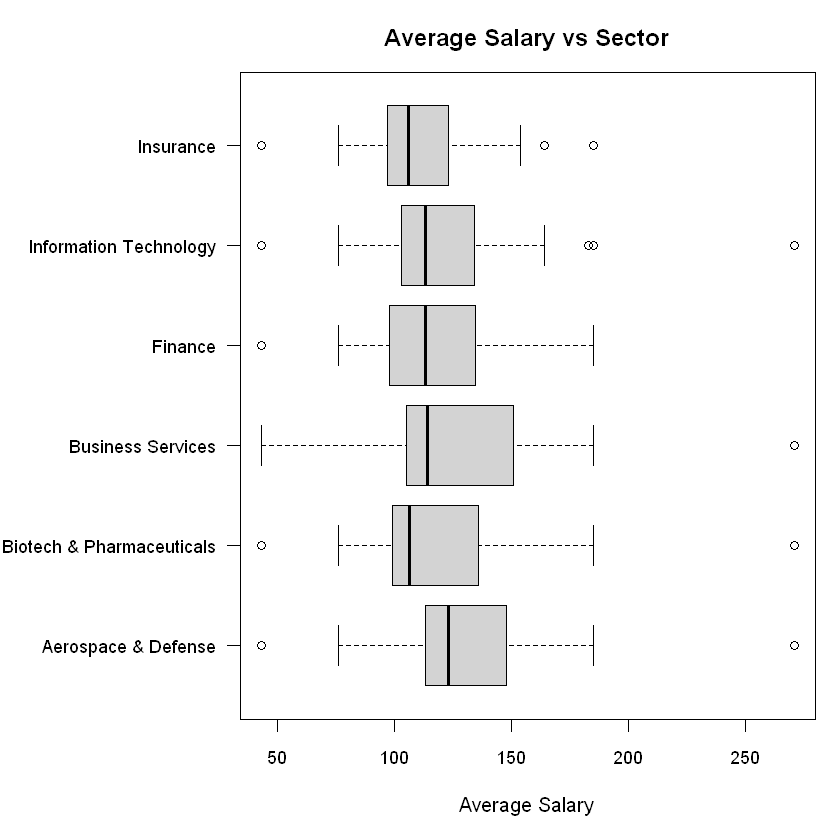

In [81]:
par(mar=c(5, 10, 3, 1))  # Adjust the margin if needed
par(cex.axis = 0.9)
par(las=1)
boxplot(df_new$avg_salary~df_new$Sector, xlab="Average Salary",ylab=" ",horizontal=TRUE)
title(main = "Average Salary vs Sector")

Normality test for data point > 30 

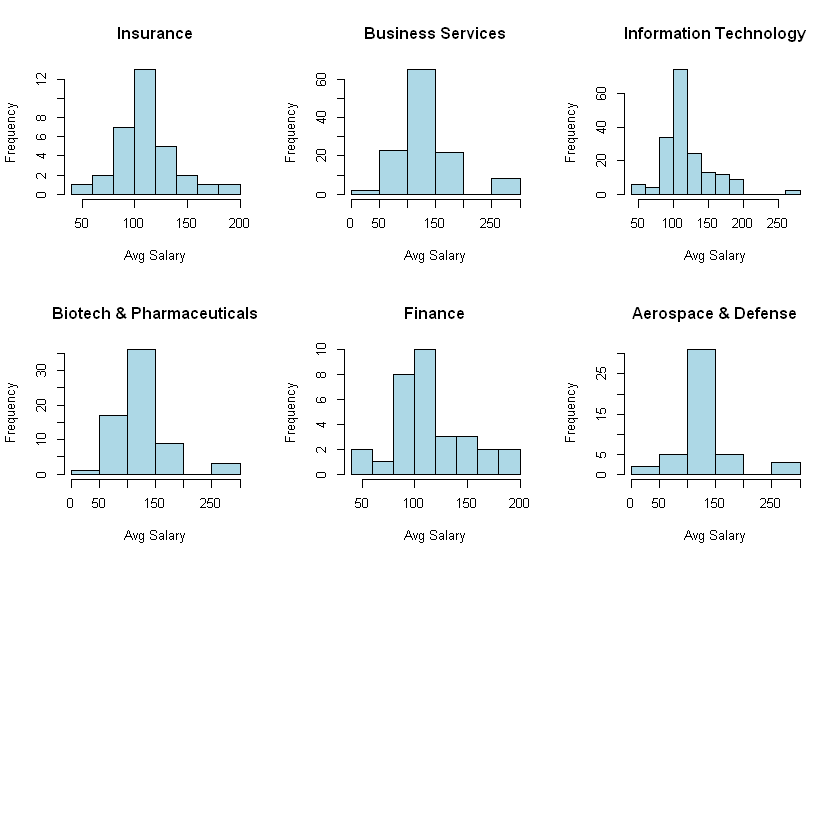

In [65]:
par(mfrow=c(3,3))
for (sector in group){
    hist(df_new[df_new$Sector == sector, 'avg_salary' ], main=sector, xlab='Avg Salary', col='lightblue')
}

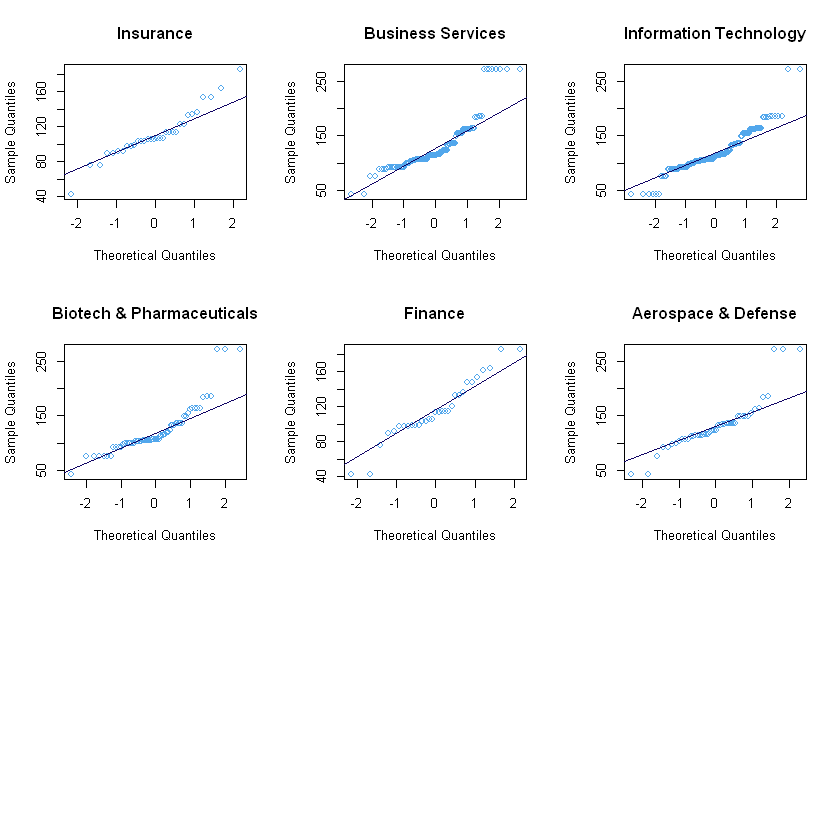

In [66]:
par(mfrow=c(3,3))
for (sector in group){
    qqnorm(df_new[df_new$Sector == sector, 'avg_salary'], main=sector, col='#52a7ec')
    qqline(df_new[df_new$Sector == sector, 'avg_salary'], col='#110464')
}

In [67]:
pvalue <- vector()
length <- vector()
for (sector in group){
    x <- df_new[df_new$Sector == sector, 'avg_salary' ]
    pvalue <- append(pvalue, round(shapiro.test(x)[[2]],9))
    length <- append(length,length(x))
}

normdf <- data.frame(group, length, pvalue)
colnames(normdf) <- c('Sector', 'Size', 'p-value')
t(normdf)

Sector,Insurance,Business Services,Information Technology,Biotech & Pharmaceuticals,Finance,Aerospace & Defense
Size,32,120,178,66,31,46
p-value,0.095147661,0.000000000,0.000000001,0.000000117,0.157394326,0.000013697


In [68]:
Insurance <- df_new[df_new$Sector == 'Insurance', 'avg_salary' ]
shapiro.test(Insurance)


	Shapiro-Wilk normality test

data:  Insurance
W = 0.94366, p-value = 0.09515


In [69]:
# Initialize lists to store the comparisons and p-values
sector1_list <- c()
sector2_list <- c()
p_value_list <- c()

# Perform variance test for each pair of sectors
for (i in 1:(length(group) - 1)) {
  for (j in (i+1):length(group)) {
    sector1 <- df_new[df_new$Sector == group[i], "avg_salary"]
    sector2 <- df_new[df_new$Sector == group[j], "avg_salary"]
    
    # Perform variance test
    var_test_result <- var.test(sector1, sector2)
    
    # Store the sector comparisons and p-values
    sector1_list <- c(sector1_list, group[i])
    sector2_list <- c(sector2_list, group[j])
    p_value_list <- c(p_value_list, round(var_test_result$p.value, 3))
  }
}

# Create a data frame to store the results
results_df <- data.frame(Sector1 = sector1_list, Sector2 = sector2_list, P_Value = p_value_list)

results_df

Sector1,Sector2,P_Value
<chr>,<chr>,<dbl>
Insurance,Business Services,0.001
Insurance,Information Technology,0.192
Insurance,Biotech & Pharmaceuticals,0.007
Insurance,Finance,0.261
Insurance,Aerospace & Defense,0.003
Business Services,Information Technology,0.000
Business Services,Biotech & Pharmaceuticals,0.536
Business Services,Finance,0.046
Business Services,Aerospace & Defense,0.969


Since Insurance, Business Services and Information Technology has no equal variance, we left with 3 sectors Aerospace & Defense, Finance and Biotech & Pharmaceuticals which satisfy all conditions to perform anova test

Anova Test for the sector with the 3 sectors

In [70]:
# Extract rows where Sector is Biotech & Pharmaceuticals, Finance, or Aerospace & Defense
select_sectors <- c("Biotech & Pharmaceuticals", "Finance", "Aerospace & Defense")
filtered_df <- df_new[df_new$Sector %in% select_sectors, ]

# Print the first few rows of the filtered dataframe
head(filtered_df)

,Sector,avg_salary
,<chr>,<int>
7,Biotech & Pharmaceuticals,154
26,Finance,154
27,Aerospace & Defense,154
31,Biotech & Pharmaceuticals,103
40,Finance,103
43,Biotech & Pharmaceuticals,103


In [71]:
summary(aov(avg_salary ~ Sector, data = filtered_df))

             Df Sum Sq Mean Sq F value Pr(>F)
Sector        2   5567    2784   1.531   0.22
Residuals   140 254546    1818               

#### p-value<0.05, reject H0 

In [72]:
pairwise.t.test(filtered_df$avg_salary, filtered_df$Sector, p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  filtered_df$avg_salary and filtered_df$Sector 

                          Aerospace & Defense Biotech & Pharmaceuticals
Biotech & Pharmaceuticals 0.231               -                        
Finance                   0.092               0.456                    

P value adjustment method: none 

IT vs A&D => 0.038 <br>
I vs A&D => 0.02 <br>
IT vs Bus => 0.019<br>
I vs Bus => 0.018 

From the pairwise t-test, we see that IT and insurance sector are significantly different from Aerospace & Defense and Business Services sector.